<h1>importing the libraries</h1>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

<h1>importing the datasets</h1>

In [13]:
data=pd.read_csv("../Data/cleaned_data.csv")
data

KeyboardInterrupt: 

<h1>split the data to dependent & independent variables</h1>

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

<h1>split the dataset to train & test data</h1>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42)

<h1>Standardization</h1>

In [ ]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-8.68060343e-02, -3.24692339e-01, -1.97112216e+00, ...,
         6.04381137e-01,  3.47242451e+00, -4.73530845e+00],
       ...,
       [-1.02706913e-01, -1.09391127e+00, -8.88773581e-02, ...,
        -1.04760342e-01,  2.50987747e-01,  8.57321842e-04],
       [-1.06764758e-01, -3.24692339e-01,  5.46255352e+00, ...,
        -1.23843130e-01,  3.90194942e+00,  4.74162131e+00],
       [-9.90317071e-02, -3.07210090e-01, -8.88773581e-02, ...,
        -1.23226125e-01,  7.91777863e-02,  8.57321842e-04]],
      shape=(2363075, 37))

<h1>training the model Naive Bayes</h1>

In [ ]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


<h3>predict the test data</h3>

In [ ]:
y_pred=classifier.predict(x_test)

<h2>the metrics </h2>

<h4>the accuracy </h4>

In [ ]:
acc=accuracy_score(y_pred,y_test)
print("the accuracy is:",acc)

the accuracy is: 0.972708864509167


<h4>the confusion matrix</h4>

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[  63233   64388]
 [    103 2235351]]


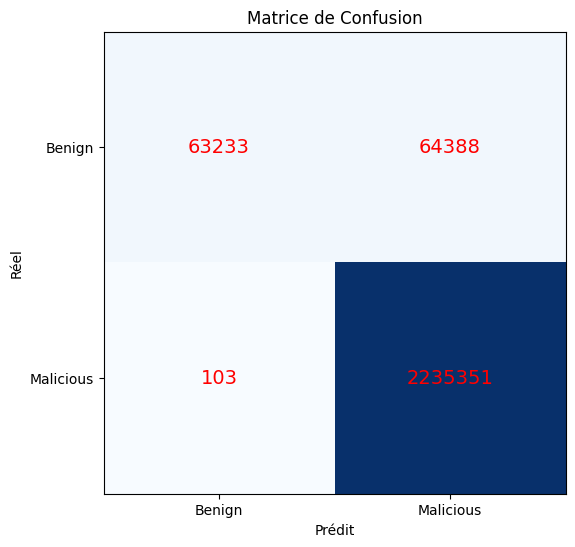

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


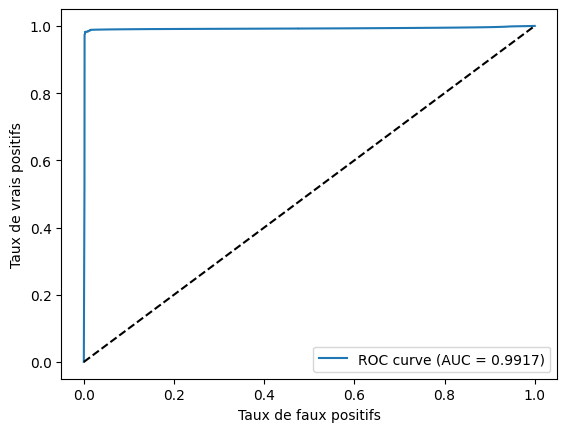

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Ligne de hasard
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

<h3>conclusion<h3>

Avec l’utilisation du modèle <i>Naive Bayes</i>, le système de classification a atteint une accuracy de [97%], ce qui indique, à première vue, une performance globale élevée. Toutefois, étant donné le déséquilibre de la variable cible entre les classes benign et malicious, cette métrique à elle seule peut être trompeuse et conduire à ce que l’on appelle l’accuracy paradox. Afin de garantir une évaluation plus fiable du modèle, les métriques Recall et F1-score ont également été analysées. Ces indicateurs permettent de mesurer respectivement la capacité du modèle à détecter correctement les instances malicious et l’équilibre entre la précision et le rappel. Les valeurs obtenues pour le recall et le F1-score confirment que la performance du modèle ne repose pas uniquement sur la prédiction majoritaire de la classe dominante, mais qu’il parvient effectivement à identifier les comportements malveillants de manière pertinente.